In [27]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import numpy as np
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.model_selection import train_test_split #this is the function we need to split the data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df1 = pd.read_csv('steps.csv', sep=';')
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [3]:
df = pd.merge(df1, df2, on = 'id')

df.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [4]:
df.fillna(0)
df.head()
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Data columns (total 337 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   20-6-2013    float64
 2   21-6-2013    float64
 3   22-6-2013    float64
 4   23-6-2013    float64
 5   24-6-2013    float64
 6   25-6-2013    float64
 7   26-6-2013    float64
 8   27-6-2013    float64
 9   28-6-2013    float64
 10  29-6-2013    float64
 11  30-6-2013    float64
 12  1-7-2013     float64
 13  2-7-2013     float64
 14  3-7-2013     float64
 15  4-7-2013     float64
 16  5-7-2013     float64
 17  6-7-2013     float64
 18  7-7-2013     float64
 19  8-7-2013     float64
 20  9-7-2013     float64
 21  10-7-2013    float64
 22  11-7-2013    float64
 23  12-7-2013    float64
 24  13-7-2013    float64
 25  14-7-2013    float64
 26  15-7-2013    float64
 27  16-7-2013    float64
 28  17-7-2013    float64
 29  18-7-2013    float64
 30  19-7-2013    float64
 31  20-7-2013    float64
 32  21-7-

In [5]:
df['steps mean']=df.iloc[:,1:328].mean(axis=1)

df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,steps mean
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630


Text(0.5, 1.0, 'gemiddeld aantal stappen per persoon')

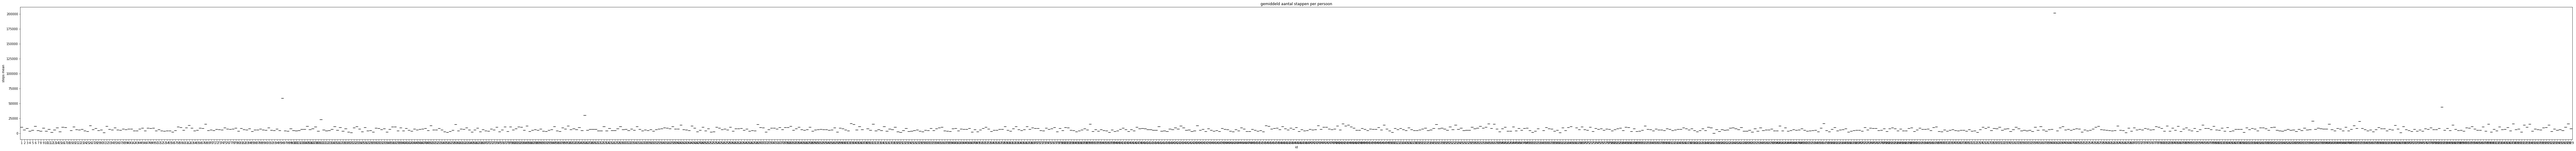

In [6]:
plt.figure(figsize = (150,8))
ax=sns.boxplot(x='id',y='steps mean',data=df)
plt.title('gemiddeld aantal stappen per persoon')



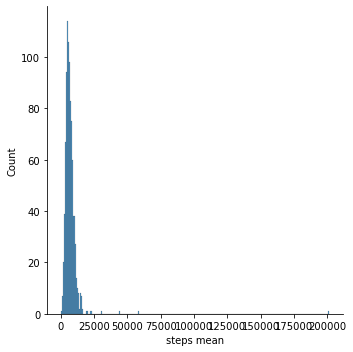

In [7]:
ax=sns.displot(x='steps mean',data=df)


In [8]:
df['steps mean'].mean()

7036.627484984338

In [9]:
df['steps mean'].median()

6245.006060606061

In [10]:
df['steps mean'].max()

201722.6

In [11]:
df['steps mean'].std()

7396.87900787018

opvallend is dat er een aantal (ongeveer 4) heel erg uitspringen. hierbij vraag ik me af waarom deze 4 mensen zo heel veel meer stappen zetten, zijn dit topsporters of doen ze werk waar ze heel veel bij moeten lopen?. de hoogste stap is natuurlijk veel te veel en onrealistisch.

# opdracht 2

The prediction of the model can be improved by computing a variable that gives a better indication of a healthy weight than weight alone. Can you think of one? lengte en gewicht bijvoorbeeld, want iemand van 2 meter van 90 kilo is heel anders dan iemand van 1 meter 70.

In [12]:
df.drop(df.columns[0:329], axis=1, inplace=True)
df = df.fillna(0)
df.head()

,city,gender,age,hh_size,education,education_1,height,weight,steps mean
0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630


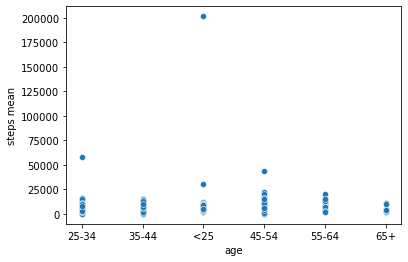

In [13]:
ax=sns.scatterplot(x='age',y='steps mean',data=df)

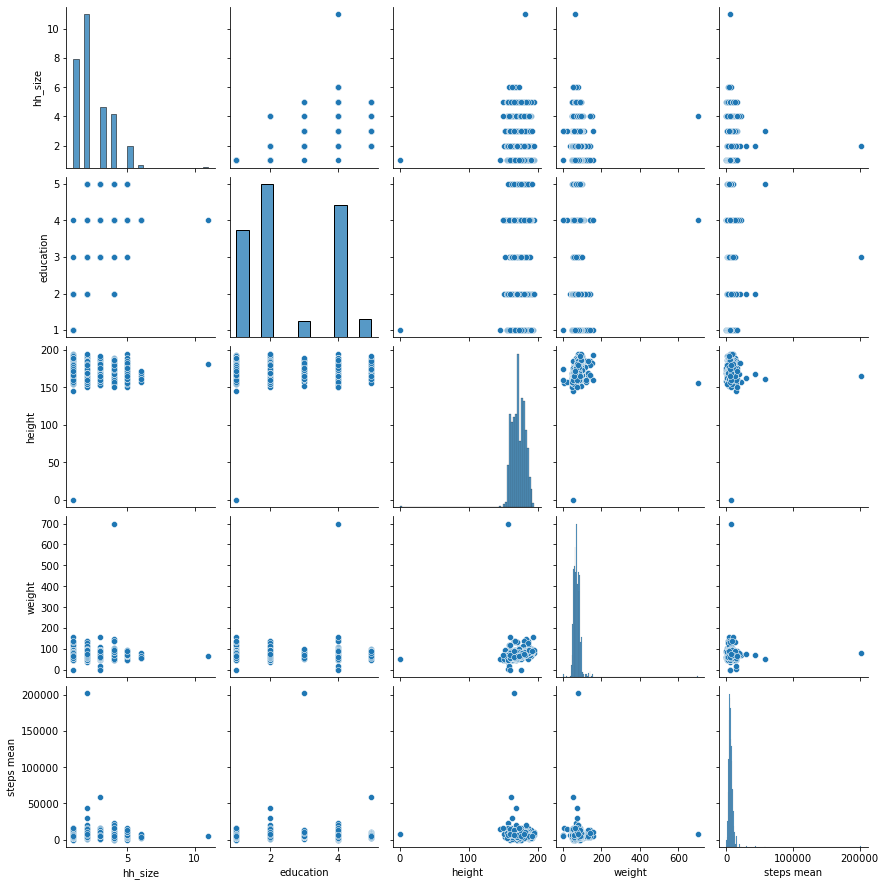

In [14]:
ax=sns.pairplot(df)

het is duidelijk dat gewicht en leeftijd veel effect hebben op het gemiddeld aantal stappen.

# opdracht 3

Met inear regression voorspellen we de waarde van een afhankelijke variabele op basis van de waarde van een (of meer) onafhankelijke variabele(n

In [22]:
x = df.loc[:, ~df.columns.isin(['steps mean','city','gender','education_1','age'])]
y = df['steps mean']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=23) #splits the data into train (70%) and test (30%) data

In [23]:
lm = LinearRegression()

lm = lm.fit(x_train,y_train)

In [24]:
y_test_p = lm.predict(x_test)

In [25]:
r2_score(y_test,y_test_p)

0.003105167513143159

In [28]:
math.sqrt(mean_squared_error(y_test,y_test_p))

4273.896067153865

er is een afwijking van ongeveer 4250 op het gemiddeld aatal stappen, dit valt in verhouding wel mee. de r2 test is minder dan een dat betekent dus dat de voorspelling goed past op de data.